# ADQUISICION DE DATOS

In [ ]:
#Librerìas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_beb=pd.read_excel("Beb.xlsx") #Database de nacimientos
df_beb.shape

(1964, 8)

In [ ]:
df_mv=pd.read_excel("miviviendae.xlsx") #Database de mivivienda
df_mv.shape

(13507, 15)

In [ ]:
#Importamos los datos de cada dataset
df_beb=pd.read_excel("Beb.xlsx")
df_beb.shape
df_mv=pd.read_excel("miviviendae.xlsx")
display(df_beb.head())
display(df_mv.head())
#df_beb.drop("Mes")

,Año,Mes,DEPARTAMENTO_NAC,PROVINCIA_NAC,DISTRITO_NAC,Ubigeo,GENERO,CANT_ACTAS
0,2022,1,Ancash,Huaraz,Huaraz,20101.0,MASCULINO,1
1,2022,1,Ancash,Huaraz,Independencia,20105.0,MASCULINO,1
2,2022,1,Ancash,Huaraz,Independencia,20105.0,FEMENINO,1
3,2022,1,Ancash,Santa,Chimbote,21801.0,MASCULINO,6
4,2022,1,Ancash,Santa,Chimbote,21801.0,FEMENINO,5


,Año,Mes,PRODUCTO,DEPARTAMENTO,PROVINCIA,DISTRITO,Ubigeo,IFI,TIPO_IFI,MONTO_CREDITO,MONTO_CUOTA_INICIAL,PLAZOS,TASA,MONTO_VALOR_VIVIENDA,FECHA_CORTE
0,2022,1,NCMV,SAN MARTIN,PICOTA,PICOTA,220701,CMAC MAYNAS,CMAC,35400.0,5000.0,120,12.00,65000.0,20230811
1,2022,1,FCTP,UCAYALI,CORONEL PORTILLO,CAMPOVERDE,250102,CMAC MAYNAS,CMAC,36650.0,50.0,120,13.89,74000.0,20230811
2,2022,1,NCMV,ICA,ICA,ICA,110101,CMAC ICA,CMAC,94100.0,13000.0,108,10.70,131000.0,20230811
3,2022,1,FCTP,ICA,ICA,ICA,110101,CMAC ICA,CMAC,44530.0,4370.0,180,18.50,87400.0,20230811
4,2022,1,NCMV,LIMA,LIMA,COMAS,150110,FINANCIERA EFECTIVA S. A,FINANCIERA,70390.0,14000.0,300,7.99,109990.0,20230811


In [ ]:
#df_mv['Cant_coloc_total'] = df_mv['MONTO_CREDITO'].groupby(df_mv['Ubigeo']).count()
#Agrupamos y sumarizamos por ubigeo y añadimos una columna más
#df_mv.head()

#PREPROCESAMIENTO

## Tratamiento de valores faltantes

In [ ]:
df_beb.isnull().sum()

Año                  0
Mes                  0
DEPARTAMENTO_NAC     0
PROVINCIA_NAC        0
DISTRITO_NAC         0
Ubigeo              12
GENERO               9
CANT_ACTAS           0
dtype: int64

In [ ]:
#TOTALIZAR REGISTROS DE ACTAS SEGUN DISTRITO
df_beb['Cant_actas_total'] = df_beb['CANT_ACTAS'].groupby(df_beb['Ubigeo']).transform('sum') #Agrupamos y sumarizamos por ubigeo y añadimos una columna más
#df_beb.drop("GENERO",axis=1)
df_beb.dropna() # sin las filas que tienen valores faltantes en df_beb
df_beb.drop_duplicates("Ubigeo") #Dropeamos registros que estén duplicados

#ELIMINAR COLUMNAS
df_mv.drop(["DEPARTAMENTO","PROVINCIA","DISTRITO"],axis=1,inplace=True) #Dropeamos las Columnas Departamento, Provincia y Distrito
df=pd.merge(df_beb, df_mv, how='left') # Unimos ambos DataFrames para obtener el tablón final con la función mege
df.head()

,Año,Mes,DEPARTAMENTO_NAC,PROVINCIA_NAC,DISTRITO_NAC,Ubigeo,GENERO,CANT_ACTAS,Cant_actas_total,PRODUCTO,IFI,TIPO_IFI,MONTO_CREDITO,MONTO_CUOTA_INICIAL,PLAZOS,TASA,MONTO_VALOR_VIVIENDA,FECHA_CORTE
0,2022,1,Ancash,Huaraz,Huaraz,20101.0,MASCULINO,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,1,Ancash,Huaraz,Independencia,20105.0,MASCULINO,1,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,1,Ancash,Huaraz,Independencia,20105.0,FEMENINO,1,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,1,Ancash,Santa,Chimbote,21801.0,MASCULINO,6,59.0,NCMV,BANBIF,BANCO,111400.0,17800.0,240.0,9.45,148000.0,20230811.0
4,2022,1,Ancash,Santa,Chimbote,21801.0,FEMENINO,5,59.0,NCMV,BANBIF,BANCO,111400.0,17800.0,240.0,9.45,148000.0,20230811.0


In [ ]:
df.dropna(how='all',inplace=True) # sin las filas que tienen todos los valores faltantes en data
df.shape
df.head()

,Año,Mes,DEPARTAMENTO_NAC,PROVINCIA_NAC,DISTRITO_NAC,Ubigeo,GENERO,CANT_ACTAS,Cant_actas_total,PRODUCTO,IFI,TIPO_IFI,MONTO_CREDITO,MONTO_CUOTA_INICIAL,PLAZOS,TASA,MONTO_VALOR_VIVIENDA,FECHA_CORTE
0,2022,1,Ancash,Huaraz,Huaraz,20101.0,MASCULINO,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,1,Ancash,Huaraz,Independencia,20105.0,MASCULINO,1,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,1,Ancash,Huaraz,Independencia,20105.0,FEMENINO,1,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,1,Ancash,Santa,Chimbote,21801.0,MASCULINO,6,59.0,NCMV,BANBIF,BANCO,111400.0,17800.0,240.0,9.45,148000.0,20230811.0
4,2022,1,Ancash,Santa,Chimbote,21801.0,FEMENINO,5,59.0,NCMV,BANBIF,BANCO,111400.0,17800.0,240.0,9.45,148000.0,20230811.0


# EXPLORACION INICIAL

In [ ]:
df.shape

(20918, 18)

In [ ]:
df.dtypes

Año                       int64
Mes                       int64
DEPARTAMENTO_NAC         object
PROVINCIA_NAC            object
DISTRITO_NAC             object
Ubigeo                  float64
GENERO                   object
CANT_ACTAS                int64
Cant_actas_total        float64
PRODUCTO                 object
IFI                      object
TIPO_IFI                 object
MONTO_CREDITO           float64
MONTO_CUOTA_INICIAL     float64
PLAZOS                  float64
TASA                    float64
MONTO_VALOR_VIVIENDA    float64
FECHA_CORTE             float64
dtype: object

In [ ]:
df.isnull().sum()

Año                       0
Mes                       0
DEPARTAMENTO_NAC          0
PROVINCIA_NAC             0
DISTRITO_NAC              0
Ubigeo                   12
GENERO                   47
CANT_ACTAS                0
Cant_actas_total         12
PRODUCTO                848
IFI                     848
TIPO_IFI                848
MONTO_CREDITO           848
MONTO_CUOTA_INICIAL     848
PLAZOS                  848
TASA                    848
MONTO_VALOR_VIVIENDA    848
FECHA_CORTE             848
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Año,20918.0,2.022000e+03,0.000000,2022.0,2022.00,2022.00,2022.00,2022.00
Mes,20918.0,6.640501e+00,3.432746,1.0,4.00,7.00,10.00,12.00
Ubigeo,20906.0,1.420969e+05,32826.099340,10101.0,150101.00,150110.00,150128.00,250107.00
CANT_ACTAS,20918.0,2.933445e+01,39.442176,1.0,3.00,12.00,42.00,257.00
Cant_actas_total,20906.0,7.258907e+02,807.531618,1.0,94.00,365.00,1219.00,2430.00
MONTO_CREDITO,20070.0,1.818629e+05,94619.064707,5300.0,105041.00,167799.00,248850.00,429385.00
MONTO_CUOTA_INICIAL,20070.0,3.707061e+04,23837.774076,0.0,20400.00,31055.00,47797.50,307296.55
PLAZOS,20070.0,2.178430e+02,57.544518,14.0,180.00,240.00,240.00,300.00
TASA,20070.0,8.988038e+00,1.532127,5.0,8.00,8.64,9.44,19.25
MONTO_VALOR_VIVIENDA,20070.0,2.367496e+05,99146.821706,54000.0,156766.79,221450.00,308085.00,464200.00


# GRAFICOS DE EXPLORACION [DATA MINING]


## Grafico de correlación entre variables

<ipython-input-12-d3656d290a79>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr().apply(lambda x: round(x,2))


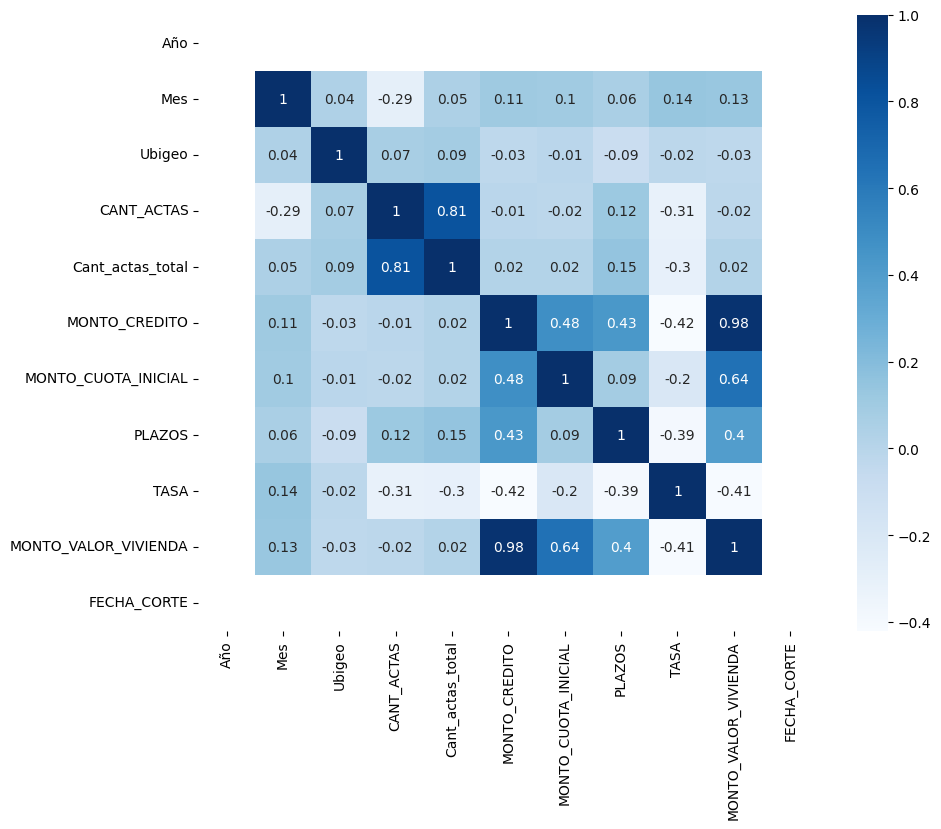

In [ ]:
df_corr = df.corr().apply(lambda x: round(x,2))
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,
            annot=True,
            cmap='Blues')
plt.show()

Comentario: Podemos identificar que como era de esperarse encontramos valores de correlacion entre variables como la cantidad de actas,

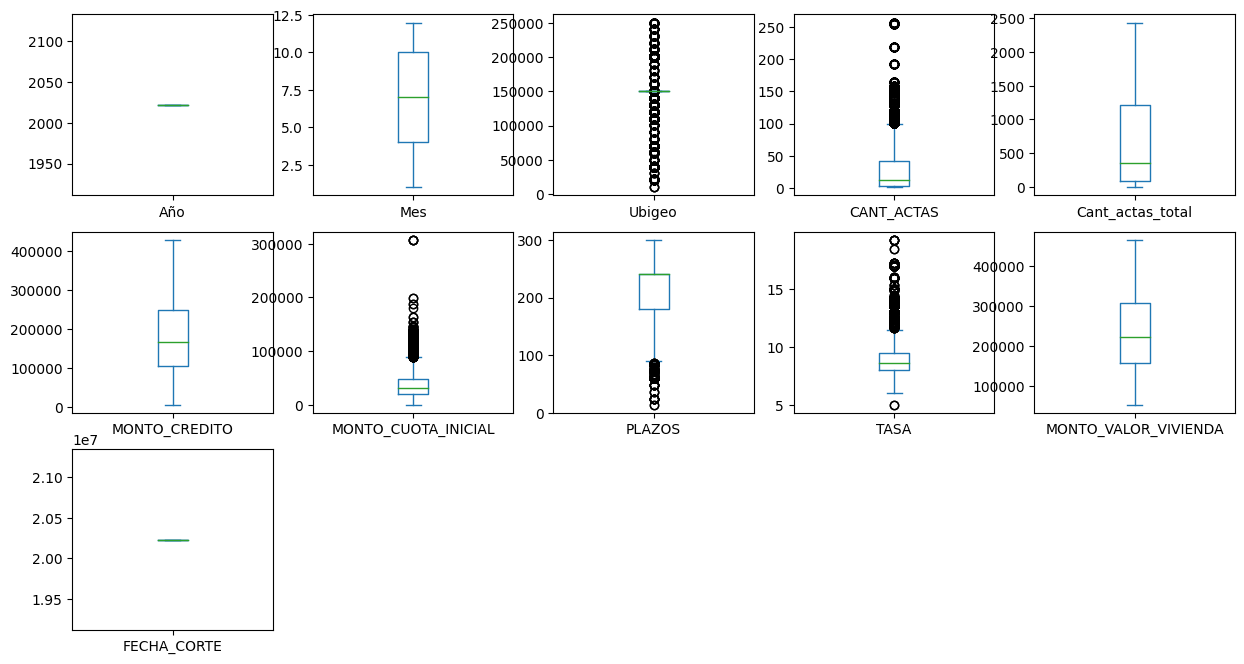

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False,  figsize=[15,8])
plt.show()

In [ ]:
df2 = df[['Mes','MONTO_CREDITO']]
df2 = df2['MONTO_CREDITO'].groupby(df2['Mes'])
df3 = df2.count()

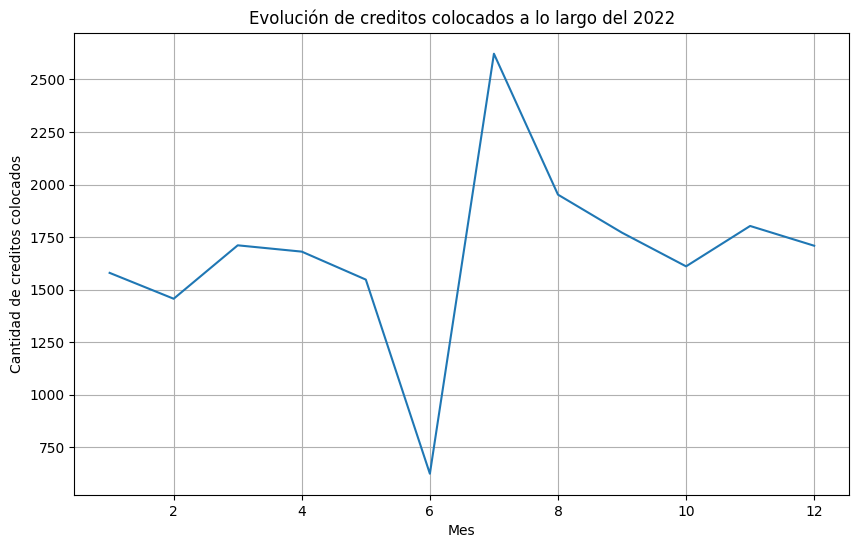

In [ ]:
df2.count().plot( figsize= [10,6] )  # tamaño del plot es de 10cm x 6cm

plt.title('Evolución de creditos colocados a lo largo del 2022',fontdict={'fontsize':12})  # Coloca titulo
plt.xlabel('Mes')        # Coloca etiqueta en eje de absisas
plt.ylabel('Cantidad de creditos colocados')  # Coloca etiqueta en eje de ordenadas
plt.grid(True)  # Muestra una grilla en el plot
plt.show()

In [ ]:
df1 = df[['Mes','CANT_ACTAS']]
df1 = df1['CANT_ACTAS'].groupby(df1['Mes'])
df4 =df1.sum()

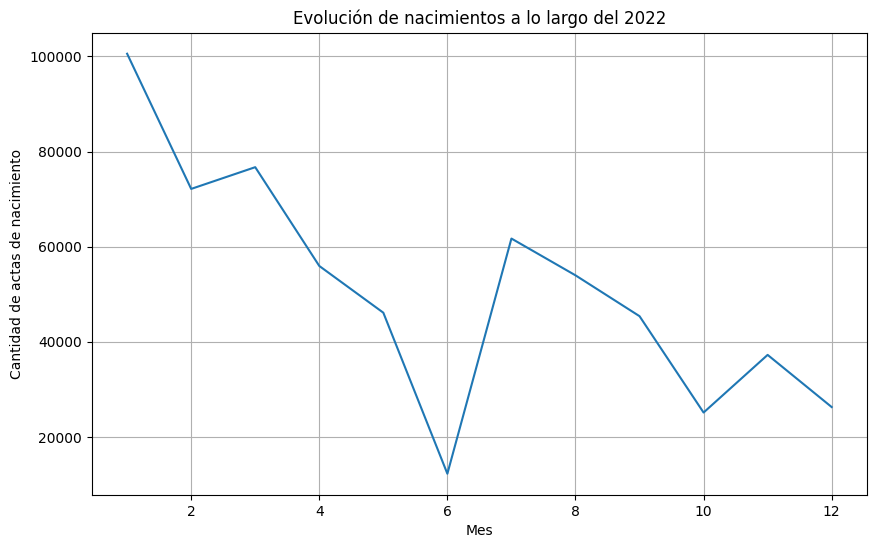

In [ ]:
df1.sum().plot( figsize= [10,6] )  # tamaño del plot es de 10cm x 6cm

plt.title('Evolución de nacimientos a lo largo del 2022',fontdict={'fontsize':12})  # Coloca titulo
plt.xlabel('Mes')        # Coloca etiqueta en eje de absisas
plt.ylabel('Cantidad de actas de nacimiento')  # Coloca etiqueta en eje de ordenadas
plt.grid(True)  # Muestra una grilla en el plot
plt.show()

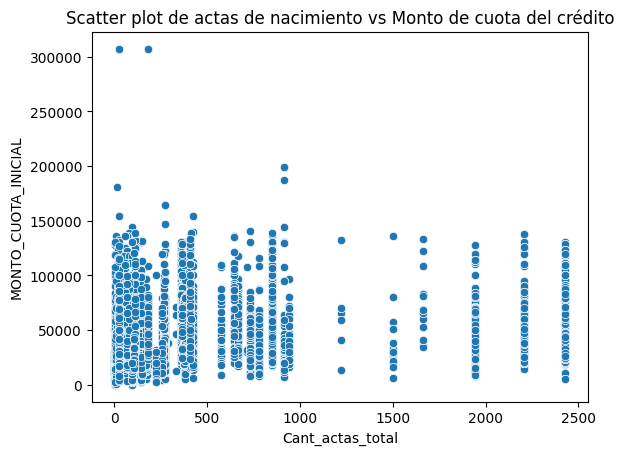

In [ ]:
#sns.scatterplot(data=df_penguins, x='bill_length_mm', y='bill_depth_mm')
#sns.scatterplot(data=df_penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')
#sns.scatterplot(data=df_penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', style='sex')
sns.scatterplot(data=df, x='Cant_actas_total', y='MONTO_CUOTA_INICIAL')#, hue='Region')
plt.title("Scatter plot de actas de nacimiento vs Monto de cuota del crédito")
plt.show()

<Figure size 800x500 with 0 Axes>

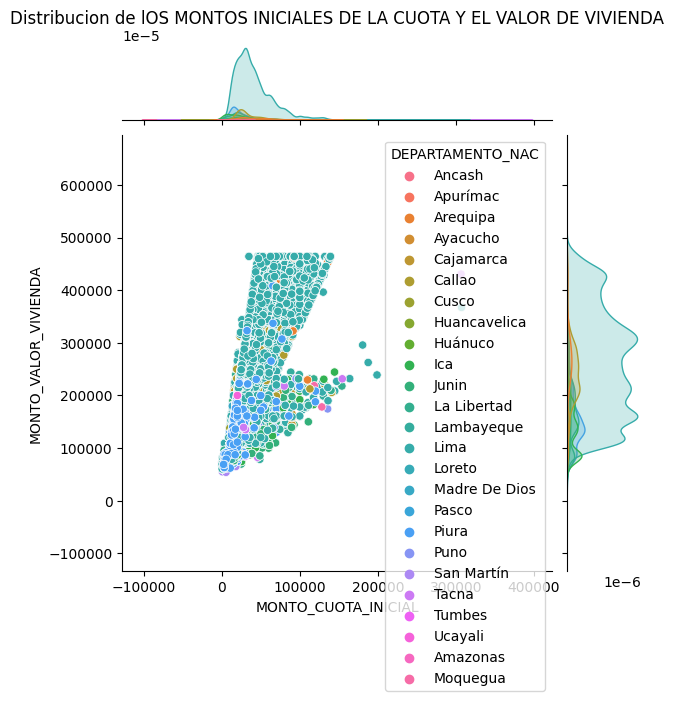

In [ ]:
plt.figure(figsize=(8, 5))  # define tamaño de figura
sns.jointplot(data=df, x="MONTO_CUOTA_INICIAL", y="MONTO_VALOR_VIVIENDA",hue='DEPARTAMENTO_NAC')
plt.title('Distribucion de lOS MONTOS INICIALES DE LA CUOTA Y EL VALOR DE VIVIENDA', pad=80)
plt.show()

In [ ]:
df.head()

,Año,Mes,DEPARTAMENTO_NAC,PROVINCIA_NAC,DISTRITO_NAC,Ubigeo,GENERO,CANT_ACTAS,Cant_actas_total,PRODUCTO,IFI,TIPO_IFI,MONTO_CREDITO,MONTO_CUOTA_INICIAL,PLAZOS,TASA,MONTO_VALOR_VIVIENDA,FECHA_CORTE
0,2022,1,Ancash,Huaraz,Huaraz,20101.0,MASCULINO,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,1,Ancash,Huaraz,Independencia,20105.0,MASCULINO,1,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,1,Ancash,Huaraz,Independencia,20105.0,FEMENINO,1,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,1,Ancash,Santa,Chimbote,21801.0,MASCULINO,6,59.0,NCMV,BANBIF,BANCO,111400.0,17800.0,240.0,9.45,148000.0,20230811.0
4,2022,1,Ancash,Santa,Chimbote,21801.0,FEMENINO,5,59.0,NCMV,BANBIF,BANCO,111400.0,17800.0,240.0,9.45,148000.0,20230811.0


In [ ]:
df4 = df.copy()
df4.drop(['Año','FECHA_CORTE','CANT_ACTAS'], axis=1,inplace=True)
df4.head()

,Mes,DEPARTAMENTO_NAC,PROVINCIA_NAC,DISTRITO_NAC,Ubigeo,GENERO,Cant_actas_total,PRODUCTO,IFI,TIPO_IFI,MONTO_CREDITO,MONTO_CUOTA_INICIAL,PLAZOS,TASA,MONTO_VALOR_VIVIENDA
0,1,Ancash,Huaraz,Huaraz,20101.0,MASCULINO,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ancash,Huaraz,Independencia,20105.0,MASCULINO,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Ancash,Huaraz,Independencia,20105.0,FEMENINO,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Ancash,Santa,Chimbote,21801.0,MASCULINO,59.0,NCMV,BANBIF,BANCO,111400.0,17800.0,240.0,9.45,148000.0
4,1,Ancash,Santa,Chimbote,21801.0,FEMENINO,59.0,NCMV,BANBIF,BANCO,111400.0,17800.0,240.0,9.45,148000.0


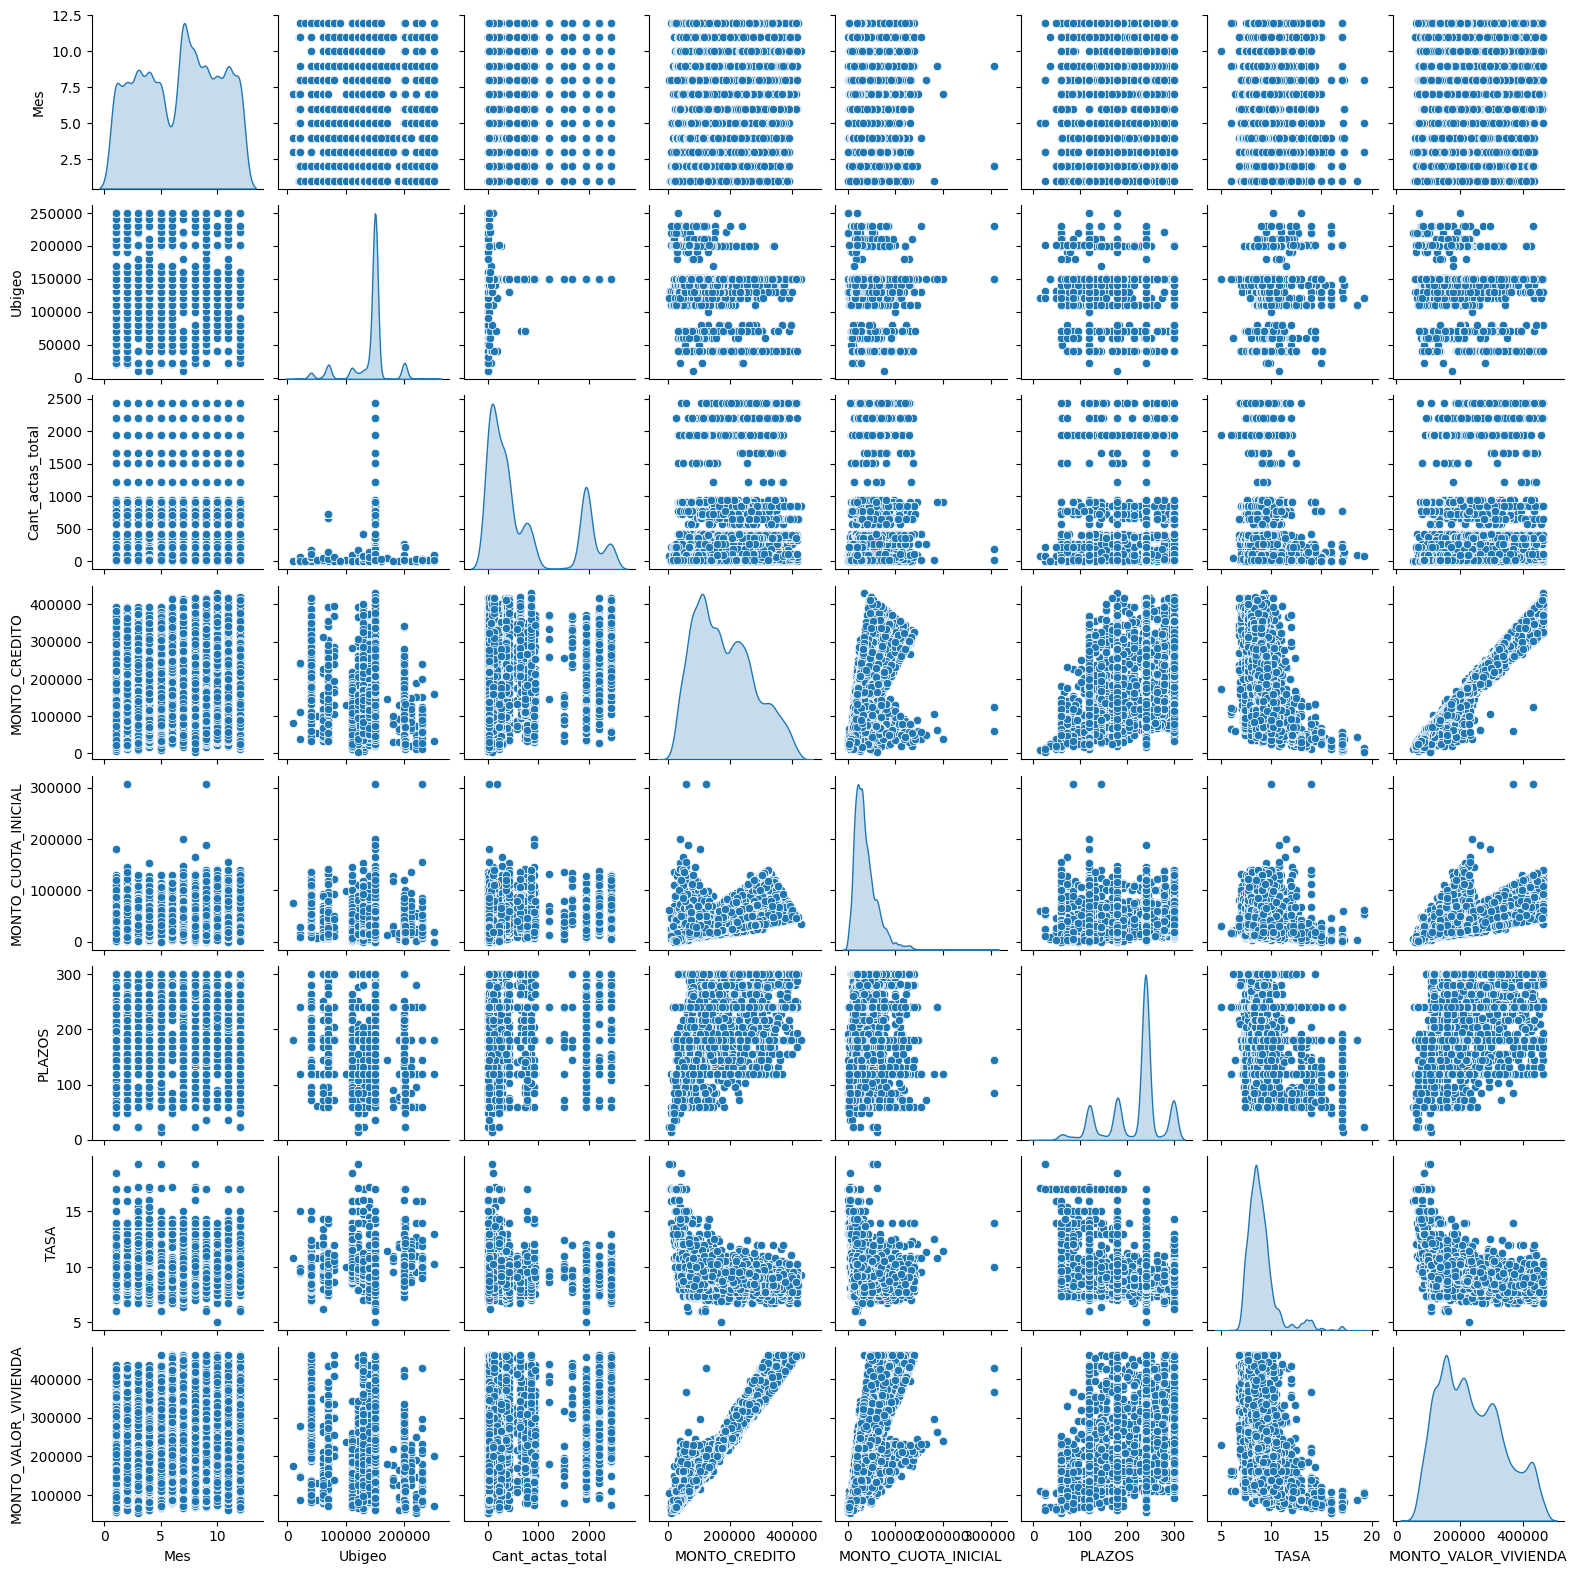

In [ ]:
sns.pairplot(data=df4, kind='scatter', diag_kind="kde", height=2)
plt.show()

Evolucion de colocaciones de **créditos** y los **registros de nacimientos**.
El eje x representaría los meses, y el eje y mostraría la cantidad de créditos o nacimientos.
Esto permitirá visualizar patrones estacionales a lo largo del año.


In [ ]:
df

,Año,Mes,DEPARTAMENTO_NAC,PROVINCIA_NAC,DISTRITO_NAC,Ubigeo,GENERO,CANT_ACTAS,Cant_actas_total,PRODUCTO,IFI,TIPO_IFI,MONTO_CREDITO,MONTO_CUOTA_INICIAL,PLAZOS,TASA,MONTO_VALOR_VIVIENDA,FECHA_CORTE
0,2022,1,Ancash,Huaraz,Huaraz,20101.0,MASCULINO,1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,1,Ancash,Huaraz,Independencia,20105.0,MASCULINO,1,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022,1,Ancash,Huaraz,Independencia,20105.0,FEMENINO,1,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022,1,Ancash,Santa,Chimbote,21801.0,MASCULINO,6,59.0,NCMV,BANBIF,BANCO,111400.0,17800.0,240.0,9.45,148000.0,20230811.0
4,2022,1,Ancash,Santa,Chimbote,21801.0,FEMENINO,5,59.0,NCMV,BANBIF,BANCO,111400.0,17800.0,240.0,9.45,148000.0,20230811.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20913,2022,12,Tacna,Tacna,Tacna,230101.0,FEMENINO,1,24.0,NCMV,CMAC HUANCAYO,CMAC,90000.0,28000.0,144.0,9.99,139400.0,20230811.0
20914,2022,12,Ucayali,Coronel Portillo,Calleria,250101.0,MASCULINO,2,96.0,NCMV,CONTINENTAL,BANCO,160400.0,20000.0,120.0,10.22,200000.0,20230811.0
20915,2022,12,Ucayali,Coronel Portillo,Calleria,250101.0,FEMENINO,1,96.0,NCMV,CONTINENTAL,BANCO,160400.0,20000.0,120.0,10.22,200000.0,20230811.0
20916,2022,12,Ucayali,Coronel Portillo,Yarinacocha,250105.0,MASCULINO,1,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_actasxmes = df.groupby('Mes')['Cant_actas_total'].sum().reset_index()
df_actasxmes

In [ ]:
df_credxmes = df.groupby('Mes')['MONTO_CREDITO'].sum().reset_index()
df_credxmes

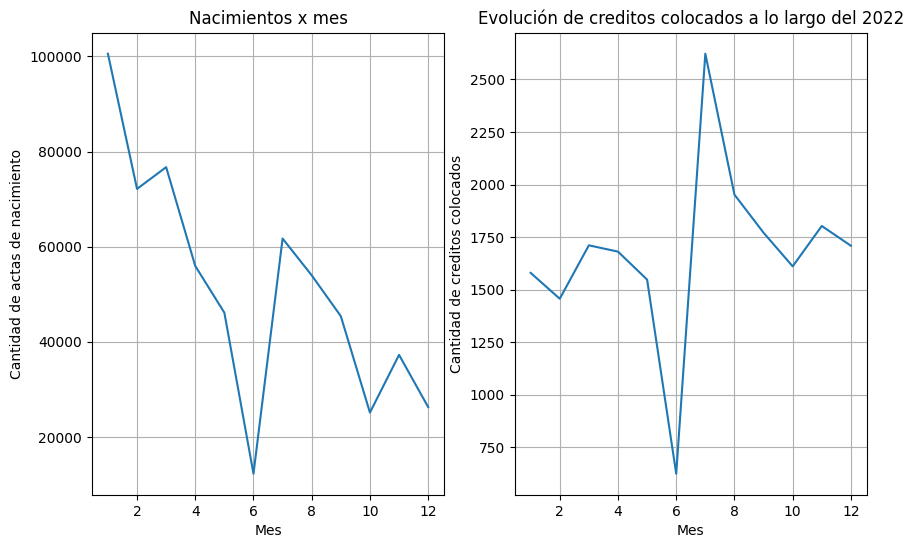

In [ ]:
fig = plt.figure(figsize=(10,6))



plt.subplot(1,2,1)
df1.sum().plot( figsize= [10,6] )  # tamaño del plot es de 10cm x 6cm

plt.title('Evolución de nacimientos a lo largo del 2022',fontdict={'fontsize':12})  # Coloca titulo
plt.xlabel('Mes')        # Coloca etiqueta en eje de absisas
plt.ylabel('Cantidad de actas de nacimiento')  # Coloca etiqueta en eje de ordenadas
plt.grid(True)  # Muestra una grilla en el plot

plt.title('Nacimientos x mes')
plt.subplot(1,2,2)
df2.count().plot( figsize= [10,6] )  # tamaño del plot es de 10cm x 6cm

plt.title('Evolución de creditos colocados a lo largo del 2022',fontdict={'fontsize':12})  # Coloca titulo
plt.xlabel('Mes')        # Coloca etiqueta en eje de absisas
plt.ylabel('Cantidad de creditos colocados')  # Coloca etiqueta en eje de ordenadas
plt.grid(True)  # Muestra una grilla en el plot

plt.show()


In [ ]:
Nacidos=df1.sum().reset_index().set_index('Mes')
Creds=df2.count().reset_index().set_index('Mes')

In [ ]:
Nacidos = (Nacidos - Nacidos.min()) / (Nacidos.max() - Nacidos.min())
Creds=(Creds - Creds.min()) / (Creds.max() - Creds.min())

In [ ]:
Nacidos.reset_index()
Creds.reset_index()

,Mes,MONTO_CREDITO
0,1,0.478217
1,2,0.416625
2,3,0.543816
3,4,0.528793
4,5,0.462193
5,6,0.000000
6,7,1.000000
7,8,0.664497
8,9,0.573861
9,10,0.493741


In [ ]:
NacidosXCreds=Nacidos.merge(Creds,how='left', on='Mes')


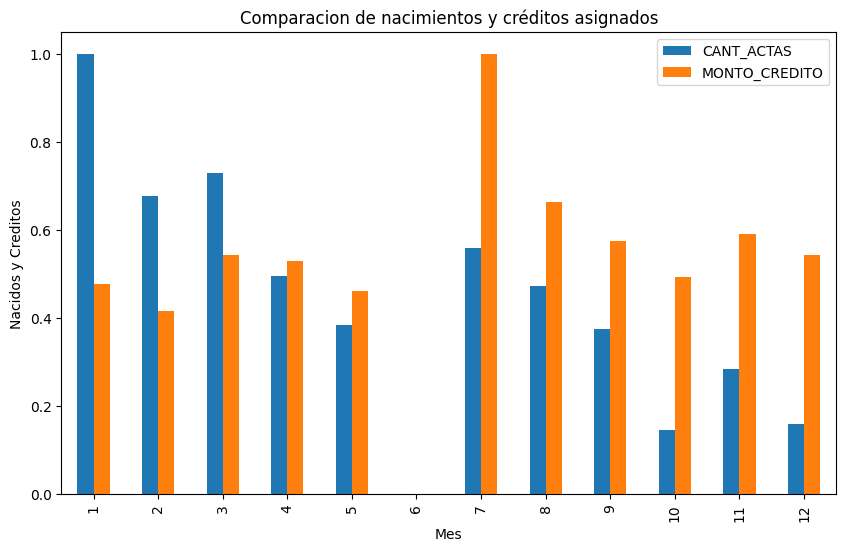

In [ ]:
# Plotea el diagrama de barras
NacidosXCreds.plot(kind='bar', figsize=(10, 6) )

# Coloca etiquetas de ejes y titulo
plt.xlabel('Mes')
plt.ylabel('Nacidos y Creditos')
plt.title('Comparacion de nacimientos y créditos asignados')
plt.show()  # muestra el plot

### ¿Cómo influyen las características socioeconómicas de los solicitantes de créditos MIVIVIENDA, como el monto del crédito y la tasa de interés, en la decisión de expandir sus familias en las áreas donde se obtuvieron estos créditos?

In [ ]:
region_mapping = {
    'Costa': ['Tumbes', 'Piura', 'Lambayeque', 'La Libertad', 'Ancash', 'Lima', 'Ica', 'Arequipa', 'Moquegua', 'Tacna'],
    'Sierra': ['Cajamarca', 'Huanuco', 'Huánuco', 'Pasco', 'Junin', 'Junín','Cuszco', 'Apurimac', 'Apurímac', 'Huancavelica', 'Ayacucho', 'Puno'],
    'Selva': ['Loreto', 'Amazonas', 'San Martin','San Martín', 'Ucayali', 'Madre de Dios']
}

# Función de mapeo para asignar regiones
def assign_region(departamento):
    for region, departamentos in region_mapping.items():
        if departamento in departamentos:
            return region
  # En caso de que el departamento no esté en ninguna región

# Aplicar la función de mapeo para crear la nueva columna 'Region'
df['Region'] = df['DEPARTAMENTO_NAC'].map(assign_region)

In [ ]:
region_mapping = {
    'Costa': ['Tumbes', 'Piura', 'Lambayeque', 'La Libertad', 'Ancash', 'Ica', 'Arequipa', 'Moquegua', 'Tacna'],
    'Sierra': ['Cajamarca', 'Huanuco', 'Huánuco', 'Pasco', 'Junin', 'Junín','Cuszco', 'Apurimac', 'Apurímac', 'Huancavelica', 'Ayacucho', 'Puno'],
    'Selva': ['Loreto', 'Amazonas', 'San Martin','San Martín', 'Ucayali', 'Madre de Dios'],
    'Lima':['Lima']
}

# Función de mapeo para asignar regiones
def assign_region(departamento):
    for region, departamentos in region_mapping.items():
        if departamento in departamentos:
            return region
  # En caso de que el departamento no esté en ninguna región

# Aplicar la función de mapeo para crear la nueva columna 'Region'
df['Region'] = df['DEPARTAMENTO_NAC'].map(assign_region)

<Figure size 800x500 with 0 Axes>

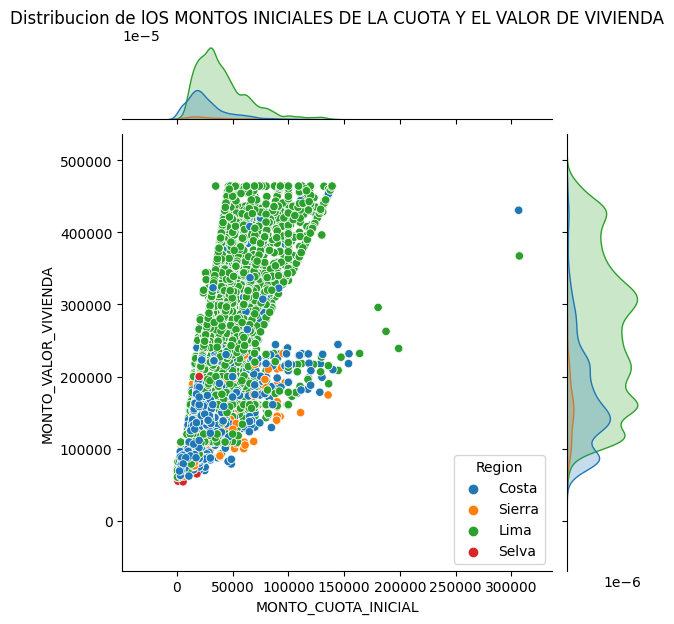

In [ ]:
plt.figure(figsize=(8, 5))  # define tamaño de figura
sns.jointplot(data=df, x="MONTO_CUOTA_INICIAL", y="MONTO_VALOR_VIVIENDA",hue='Region')
plt.title('Distribucion de lOS MONTOS INICIALES DE LA CUOTA Y EL VALOR DE VIVIENDA', pad=80)
plt.show()





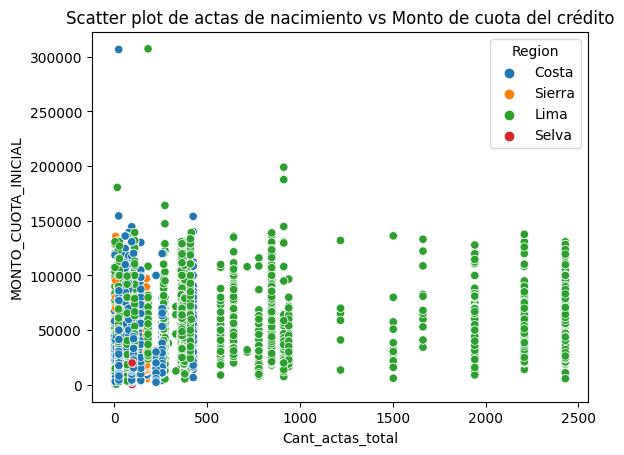

In [ ]:
sns.scatterplot(data=df, x='Cant_actas_total', y='MONTO_CUOTA_INICIAL', hue='Region')
plt.title("Scatter plot de actas de nacimiento vs Monto de cuota del crédito")
plt.show()

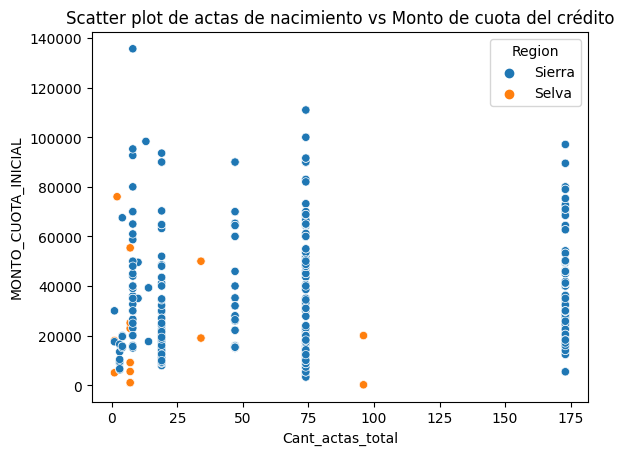

In [ ]:
regions_to_show = ['Selva', 'Sierra']
filtered_df = df[df['Region'].isin(regions_to_show)]

sns.scatterplot(data=filtered_df, x='Cant_actas_total', y='MONTO_CUOTA_INICIAL', hue='Region')
plt.title("Scatter plot de actas de nacimiento vs Monto de cuota del crédito")
plt.show()

In [ ]:
dfreg = df[['Mes','CANT_ACTAS','Region']]



In [ ]:
 dfreg

,Mes,CANT_ACTAS,Region
0,1,1,Costa
1,1,1,Costa
2,1,1,Costa
3,1,6,Costa
4,1,5,Costa
...,...,...,...
20913,12,1,Costa
20914,12,2,Selva
20915,12,1,Selva
20916,12,1,Selva
